## ASSIGNMENT-2

TEAM-NAME: 

IDs: 

NAMEs: 

### Instructions
 * Fill in the team name, id and names of all the teams members in the cell above.
 * Code must be written in Python in Jupyter Notebooks. We highly recommend using anaconda distribution or at the minimum, virtual environments for this assignment.
 * All the code and result files should be uploaded in the github classroom.
 * You can use the in-built methods and **unless explicitly mentioned**, don't need to code from scratch for this assignment. Make sure your code is modular since you will be reusing them for future assignments.
 * All the representations are expected to be in a right-hand coordinate system. All the functions related to transformation matrices, quaternions, and 3D projection are expected to be coded by you.
 * You could split the Jupyter Notebook cells where TODO is written, but please try to avoid splitting/changing the structure of other cells.
 * All the visualization should be done inside the notebook unless specified otherwise.
 * Plagiarism will lead to heavy penalty.
 * Commit this notebook in the GitHub Classroom repo and any other results files under the result folder. 
 * Commits past the deadline will not be considered.
 * Extensions will be granted using the extension policy only, so please go through the policy carefully and reach out to the TAs beforehand.

In [2]:
# List the imports here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import os
from tqdm.notebook import tqdm
import open3d as o3d

plt.style.use('seaborn')
np.__version__

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


/tmp/ipykernel_97549/2370745173.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


'1.24.3'

### SECTION 1: Non-Linear least squares optimization for Gaussian function

#### 1.1 Levenberg Marquardt

Implement the Levenberg Marquardt algorithm from scratch using numpy to solve for the parameters of a gaussian distribution.

A Gaussian distribution parametrized by $a,m,s$ is given by:

$$ y(x;a,m,s)=a \exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right) \tag{1}$$

##### Problem to solve

> Given a set of observations $y_{obs}$ and $x_{obs}$ we want to find the optimum parameters $a,m,s$ which best fit our observations given an initial estimate.

* Experiment with the number of iterations.
* Experiment with the learning rate.
* Experiment with the tolerance.

Display your results using matplotlib by plotting graphs for 
* The cost function value ($\|r\|^2$) vs the number of iterations
* The Ground Truth data values and the predicted data values.

Experiment with the hyperparameters and compile your observations in a table. Clearly mention your hyperparameters with justification.

You can refer to [Shubodh's notes](https://www.notion.so/saishubodh/From-linear-algebra-to-non-linear-weighted-least-squares-optimization-13cf17d318be4d45bb8577c4d3ea4a02) on the same to get a better grasp of the concept before implementing it.

In [30]:
##############################################################################
# TODO: Do tasks described in 1.1 (a)
##############################################################################

# Replace "pass" statement with your code
a, m, s = 50, 5, 10

def f(x, a, m, s):
    exponent = ((x - m)/(1.414213 * s)) ** 2
    return a * np.exp(-exponent)


x = np.linspace(-50, 50, 100)
y = f(x, a, m, s)


class LMSolver:
    def __init__(self, tolerance=1e-6, lam=1000):
        self.tolerance = tolerance
        self.lam = lam
        self.initialize_parameters()
        self.losses = []
        
    def initialize_parameters(self):
        self.params = np.random.randn(3) * 5
    
    def loss_fxn(self, y_pred, y):
        return np.mean((y_pred - y) ** 2)
    
    def jacobian(self, x):
        a, m, s = self.params
        exponent =((x - m)/(1.414213 * s)) ** 2
        J = np.array([
            1 * np.exp(-exponent),
            a * np.exp(-exponent) * (x-m)/ (s ** 2),
            a * np.exp(-exponent) * ((x-m) ** 2)/(s ** 3)
        ])
        
        return J
    
    def update_parameters(self, y_pred, y, x):
        Jr = self.jacobian(x)
        H = np.linalg.inv(Jr @ Jr.T + self.lam * np.eye(Jr.shape[0]))
        
        return self.params - (H @ (Jr @ (y_pred - y).reshape(-1, 1))).ravel()
    
    def fit(self, X, Y, f, epochs = 300, verbose=True):
        self.f = f
        
        for epoch in range(epochs):
        
            y_pred = self.f(X, *self.params)
            
            loss = self.loss_fxn(y_pred, Y)
            
            if loss < self.tolerance:
                print("Optimized!")
                break
            
            self.params = self.update_parameters(y_pred, y, x)
            y_temp = self.f(x, *self.params)
            loss_new = self.loss_fxn(y_temp, y)
        
            if loss_new < loss:
                self.lam /= 3
            else:
                self.lam *= 3
                                
            if verbose:
                print(f"[epoch:{epoch}] [loss: {loss:.4f} [lambda: {self.lam}]")
            self.losses.append(loss)
            
solver = LMSolver()

print(f"Initial params: {solver.params}\n")

solver.fit(x, y, f)

print(f"\nFinal params: {solver.params}")
print(f"True params: {[a, m, s]}")


##############################################################################
# END OF YOUR CODE
##############################################################################

Initial params: [ 5.58394327 -3.65608237  0.32923784]

[epoch:0] [loss: 435.2243 [lambda: 333.3333333333333]
[epoch:1] [loss: 434.0039 [lambda: 111.1111111111111]
[epoch:2] [loss: 424.3924 [lambda: 37.03703703703703]
[epoch:3] [loss: 387.4235 [lambda: 12.345679012345677]
[epoch:4] [loss: 220.6067 [lambda: 4.115226337448559]
[epoch:5] [loss: 60.8348 [lambda: 1.3717421124828528]
[epoch:6] [loss: 15.9916 [lambda: 0.4572473708276176]
[epoch:7] [loss: 0.6631 [lambda: 0.15241579027587254]
[epoch:8] [loss: 0.0025 [lambda: 0.05080526342529085]
Optimized!

Final params: [49.99843323  5.00003375 10.00020361]
True params: [50, 5, 10]


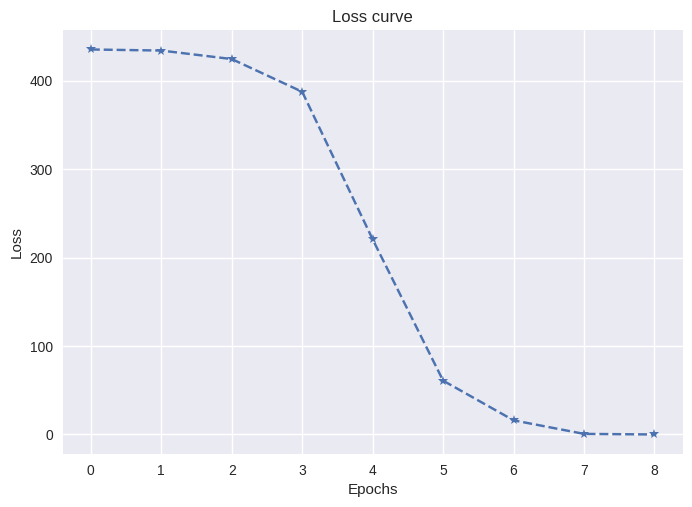

In [31]:
plt.title('Loss curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(solver.losses, '--', marker = '*')

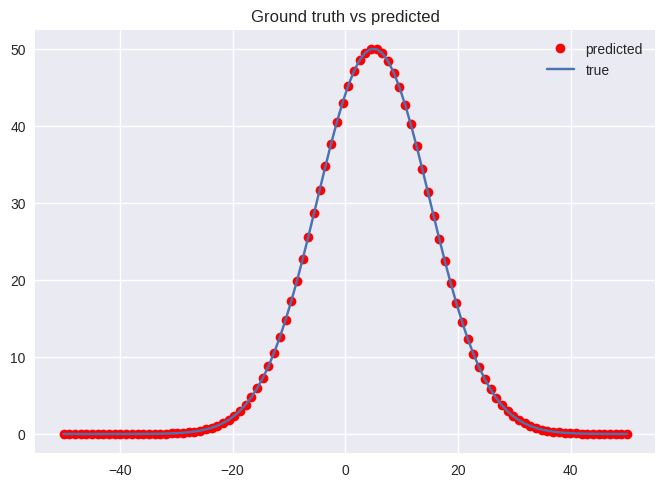

In [32]:
y_pred = f(x, *solver.params)
plt.title('Ground truth vs predicted')
plt.plot(x, y_pred, 'or', label='predicted')
plt.plot(x, y, label='true')
plt.legend()


## Observation

Optimized!
Optimized!
Optimized!
Optimized!


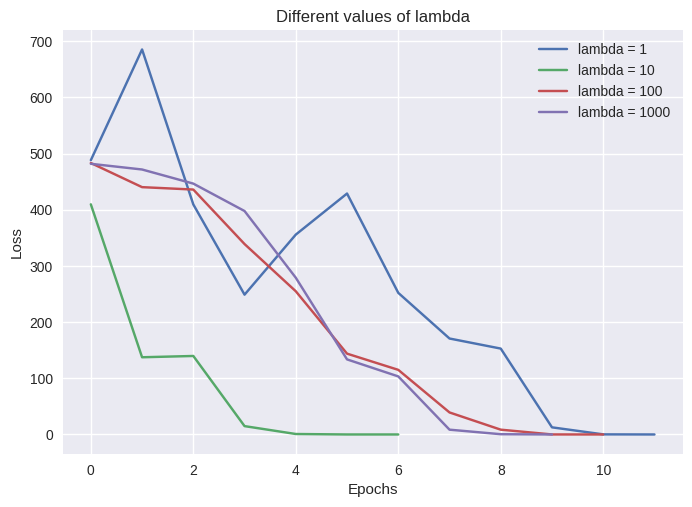

In [34]:
for i in [1, 10, 100, 1000]:
    solver = LMSolver(lam = i)
    solver.fit(x, y, f, verbose=False)
    
    plt.title('Different values of lambda')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.plot(solver.losses, label = f'lambda = {i}')
    plt.legend()

Optimized!
Optimized!
Optimized!
Optimized!
Optimized!


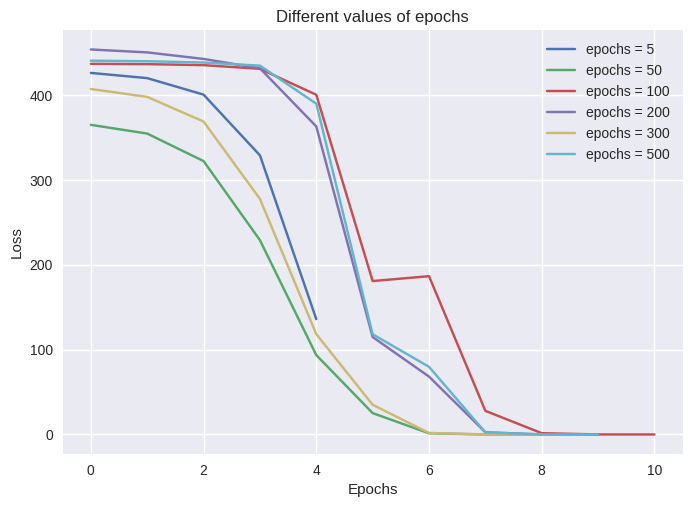

In [38]:
for i in [5, 50, 100, 200, 300, 500]:
    solver = LMSolver()
    solver.fit(x, y, f, epochs =i, verbose=False)
    
    plt.title('Different values of epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.plot(solver.losses, label = f'epochs = {i}')
    plt.legend()

Optimized!
Optimized!
Optimized!
Optimized!
Optimized!


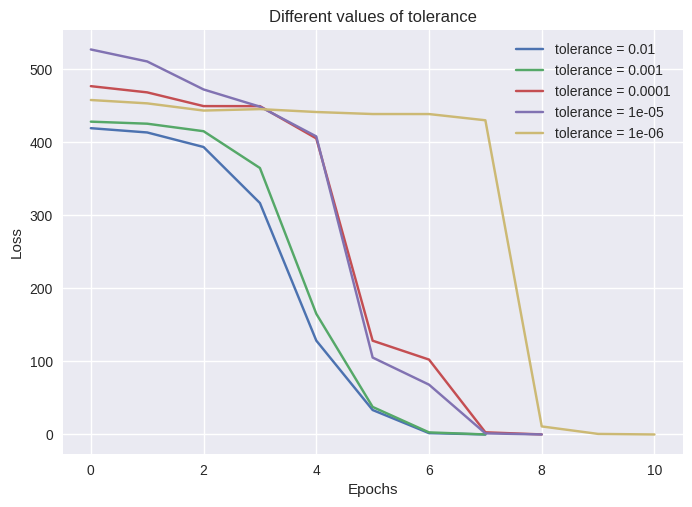

In [42]:
for i in [1e-2, 1e-3, 1e-4, 1e-5, 1e-6]:
    solver = LMSolver(tolerance=i)
    solver.fit(x, y, f, verbose=False)
    
    plt.title('Different values of tolerance')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.plot(solver.losses, label = f'tolerance = {i}')
    plt.legend()

From the above we can observe:
1. lambda = 100 gives a smooth loss function
2. Epochs ranging from 50-100 is optimal otherwise the loss doesn't converge or loss converges but we waste a lot of epochs.
3. tolerance = 1e-5 is optimal for the loss to converge quicker.

### SECTION 2: ICP

#### 2.1 Perform Procrustes alignmenton two point clouds with (given) known correspondences. 

Let X be your point cloud observed from the initial pose P1. You then transform it to a new pose P2. Now you wish to apply ICP to recover transformation between (X & P1) and (X & P2). 

Use toothless.ply point cloud and perform the alignment between the two point clouds using procrustes alignment. Your task is to write a function that takes two point clouds as input wherein the corresponding points between the two point clouds are located at the same index and returns the transformation matrix between them. Compute the alignment error after aligning the two point clouds.

**Use *root mean squared error (RSME)* as the alignment error metric.**

Make sure your code is modular as we will use this function in the next sub-part.

In [10]:
##############################################################################
# TODO: Do tasks described in 2.1
##############################################################################

# Replace "pass" statement with your code

PI = np.pi

path = './data/toothless.ply'
pcd = o3d.io.read_point_cloud(path)

def plot_pcd(pcd, create_o3d=False):
    if create_o3d:
        pcd = o3d.geometry.PointCloud(o3d.utility.Vector3dVector(pcd))
        
    visualizer = o3d.visualization.Visualizer()
    visualizer.create_window()
    visualizer.add_geometry(pcd)
    visualizer.add_geometry(o3d.geometry.TriangleMesh.create_coordinate_frame(size=50.0, origin=[0, 0, 0]))
    visualizer.run()
    
def Rx(theta) -> np.array:
    return np.array([
        [1, 0, 0],
        [0, np.cos(theta), -np.sin(theta)],
        [0, np.sin(theta), np.cos(theta)]
    ])

def Ry(theta) -> np.array:
    return np.array([
        [np.cos(theta), 0, np.sin(theta)],
        [0, 1, 0],
        [-np.sin(theta), 0, np.cos(theta)]
    ])

def Rz(theta) -> np.array:
    return np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta), np.cos(theta), 0],
        [0, 0, 1]
    ])

def get_R(alpha=0, beta=0, gamma=0) -> np.array:
    return Rz(gamma) @ Ry(beta) @ Rx(alpha)

def get_T(theta, translation):
    R = get_R(*theta)
    translation = np.array(translation)
    T = np.zeros((4,4))
    T[0:3, 0:3] = R
    T[:3, 3] = translation
    T[3, 3] = 1
    return T

def transform_pcd(pcd, T):
    new_pcd = o3d.geometry.PointCloud()
    points = np.asarray(pcd.points)
    new_pcd.points = o3d.utility.Vector3dVector(points @ T[:3, :3].T  + T[:3, -1])
    return new_pcd

T = get_T([PI/4, -PI/6, PI/3], [30, -10, 30])

pcd_transformed = transform_pcd(pcd, T)

def icp_direct(pcd1, pcd2, o3d_pcds=True):
    if o3d_pcds:
        pcd1 = np.asarray(pcd1.points)
        pcd2 = np.asarray(pcd2.points)
        
    if len(pcd1) != len(pcd2):
        raise ValueError(f"Found unequal number of points: {len(pcd1)} and {len(pcd2)}")
    
    pcd1_mean, pcd2_mean = np.mean(pcd1, axis=0), np.mean(pcd2, axis=0)
    
    H = (pcd1 - pcd1_mean).T @ (pcd2 - pcd2_mean)
    
    U, d, V = np.linalg.svd(H)
    
    R = V.T @ U.T 
    t = pcd2_mean - R @ pcd1_mean
    
    T = np.zeros((4,4))
    T[:3, :3] = R
    T[:3, -1] = t
    T[-1, -1] = 1
    
    return T

T_predicted = icp_direct(pcd1=pcd, pcd2=pcd_transformed)       
error = np.linalg.norm(T - T_predicted) ** 0.5


print("Original T:\n", T)
print("=" * 100)
print("Predicted T:\n", T_predicted)
print("=" * 100)
print("Error between the two:", error)


##############################################################################
# END OF YOUR CODE
##############################################################################

Original T:
 [[  0.4330127   -0.78914913   0.43559574  30.        ]
 [  0.75         0.04736717  -0.65973961 -10.        ]
 [  0.5          0.61237244   0.61237244  30.        ]
 [  0.           0.           0.           1.        ]]
Predicted T:
 [[  0.4330127   -0.78914913   0.43559574  30.        ]
 [  0.75         0.04736717  -0.65973961 -10.        ]
 [  0.5          0.61237244   0.61237244  30.        ]
 [  0.           0.           0.           1.        ]]
Error between the two: 1.0730659201864173e-06


#### 2.2 Implement ICP algorithm with unknown correspondences.

Your task is to write a function that implements ICP and takes two point clouds as input wherein the correspondances are unknown. Visualize the pointclouds and plot their individual coordinate frames as you perform ICP over them. Compute the alignment error in each iteration.

In [11]:
##############################################################################
# TODO: Do tasks described in 2.2
##############################################################################

# Replace "pass" statement with your code
from sklearn.neighbors import NearestNeighbors

pcd1, pcd2 = np.asarray(pcd.points), np.asarray(pcd_transformed.points)
indices = np.random.choice(len(pcd1), 10000, replace=False)

pcd1, pcd2 = pcd1[indices], pcd2[indices]

iteration = 30

for i in range(iteration):
    knn = NearestNeighbors(n_neighbors=1)
    knn.fit(pcd2)
    distances, correspondences = knn.kneighbors(pcd1)
    
    T_pred = icp_direct(pcd1[correspondences.ravel()], pcd2, o3d_pcds=False)
    
    pcd1 = pcd1 @ T_pred[:3, :3].T + T_pred[:3, -1]
    
    error = np.linalg.norm(pcd2 - pcd1) ** 0.5
    # plot_pcd(np.concatenate([pcd1, pcd2], axis=0), create_o3d=True)
    
    print(f"[Iteraton: {i}] [Error: {error}]")Facebook


##############################################################################
# END OF YOUR CODE

[Iteraton: 0] [Error: 84.40895910774022]
[Iteraton: 1] [Error: 75.94324710961361]
[Iteraton: 2] [Error: 71.02175594846148]
[Iteraton: 3] [Error: 53.25467207925592]
[Iteraton: 4] [Error: 41.22104653066382]
[Iteraton: 5] [Error: 36.94618884094768]
[Iteraton: 6] [Error: 32.71691043973095]
[Iteraton: 7] [Error: 29.489647523619784]
[Iteraton: 8] [Error: 26.597956074752485]
[Iteraton: 9] [Error: 24.483367114900457]
[Iteraton: 10] [Error: 22.45347719898831]
[Iteraton: 11] [Error: 20.706978920301417]
[Iteraton: 12] [Error: 18.951676297643633]
[Iteraton: 13] [Error: 17.34748995311732]
[Iteraton: 14] [Error: 15.662625127959517]
[Iteraton: 15] [Error: 14.244101995470109]
[Iteraton: 16] [Error: 12.762424484633529]
[Iteraton: 17] [Error: 11.207441643195331]
[Iteraton: 18] [Error: 9.239269506865275]
[Iteraton: 19] [Error: 6.379794612475545]
[Iteraton: 20] [Error: 2.718052138454194]
[Iteraton: 21] [Error: 0.26931391580720865]
[Iteraton: 22] [Error: 2.999962540424062e-06]
[Iteraton: 23] [Error: 2.1591

In [12]:
plot_pcd(np.concatenate([pcd1, pcd2], axis=0), create_o3d=True)
